In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Datamining_project"

/content/drive/MyDrive/Datamining_project


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/Datamining_project/df_imputed.csv')

In [ ]:
dataset.shape

(11115, 10)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve

In [6]:
X = dataset.drop(columns=['Potability'])  # Features
y = dataset['Potability']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best SVM Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Validation Metrics:
Accuracy: 0.6122
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Log Loss: 0.6669


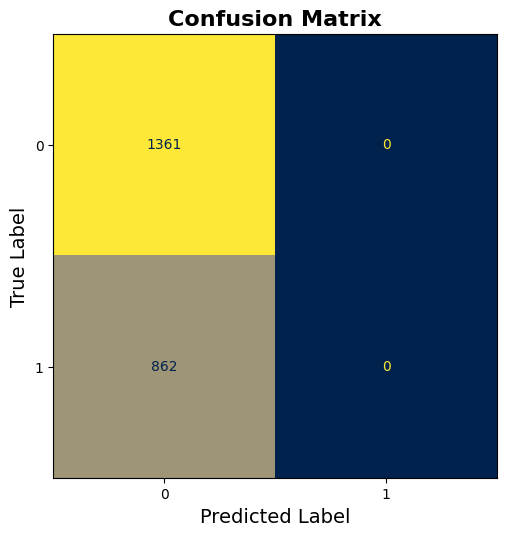

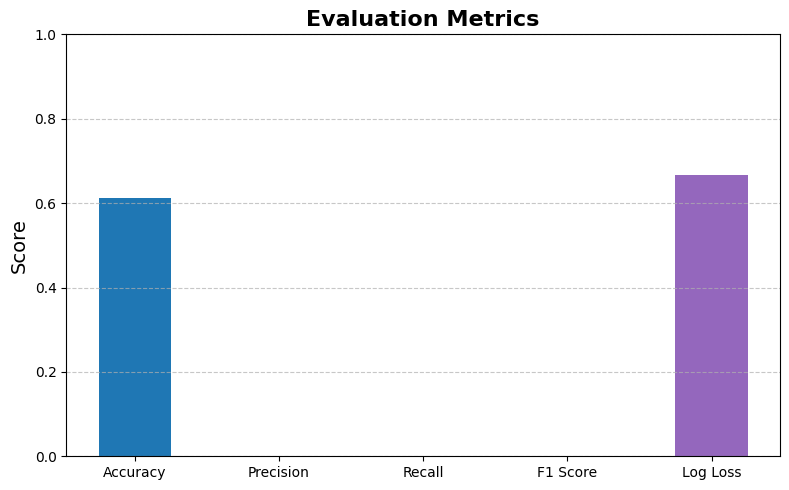

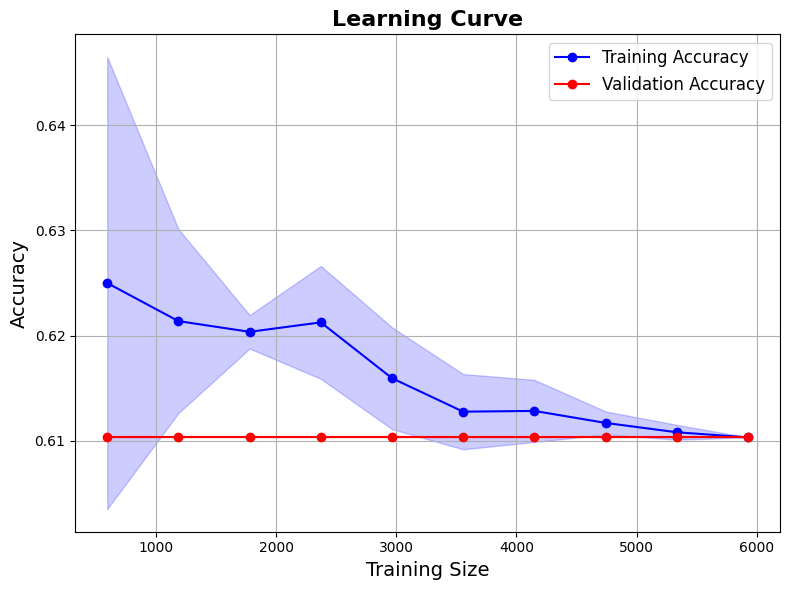

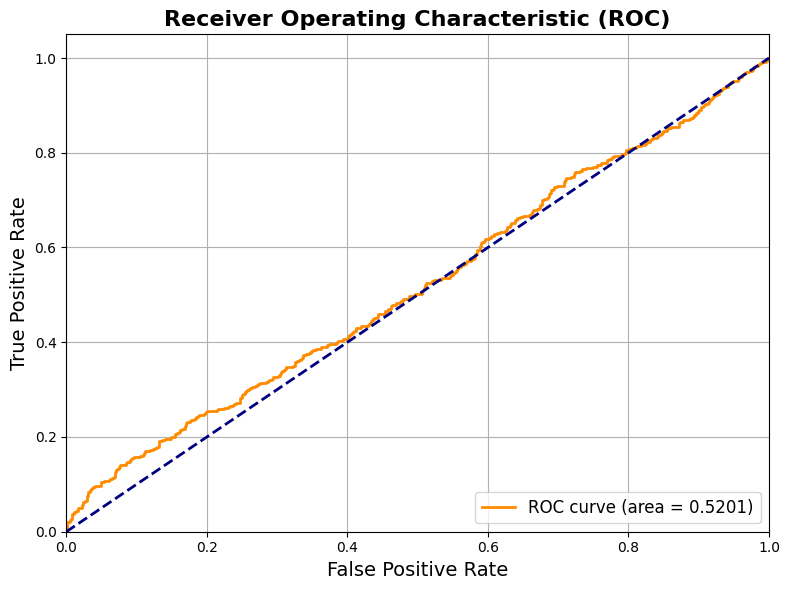

Best model saved to 'best_svm_model.joblib'


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the SVM model
svm = SVC(probability=True, random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'C': [0.1, 1],  # Reduced hyperparameter space
    'kernel': ['linear'],  # Try just the linear kernel
    'gamma': ['scale'],  # Use just the default gamma
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best SVM Hyperparameters:", best_params)

# Make predictions using the best model
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled) if hasattr(best_model, "predict_proba") else None

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba) if y_val_proba is not None else None

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}" if log_loss_val else "Log Loss: N/A")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_val))
disp.plot(cmap="cividis", colorbar=False, ax=ax)
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val if log_loss_val is not None else 0  # Set Log Loss to 0 if None
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba[:, 1])  # For binary classification, use the positive class probabilities
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16, fontweight="bold")
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the best model using joblib
joblib.dump(best_model, 'best_svm_model.joblib')
print("Best model saved to 'best_svm_model.joblib'")


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best SVM Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Metrics:
Accuracy: 0.7494
Precision: 0.8131
Recall: 0.4594
F1 Score: 0.5871
Log Loss: 0.5176


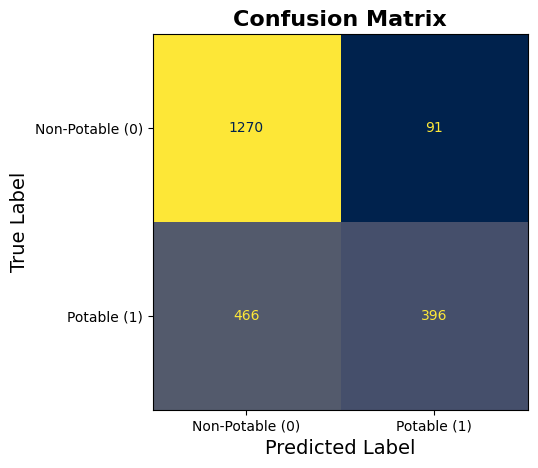

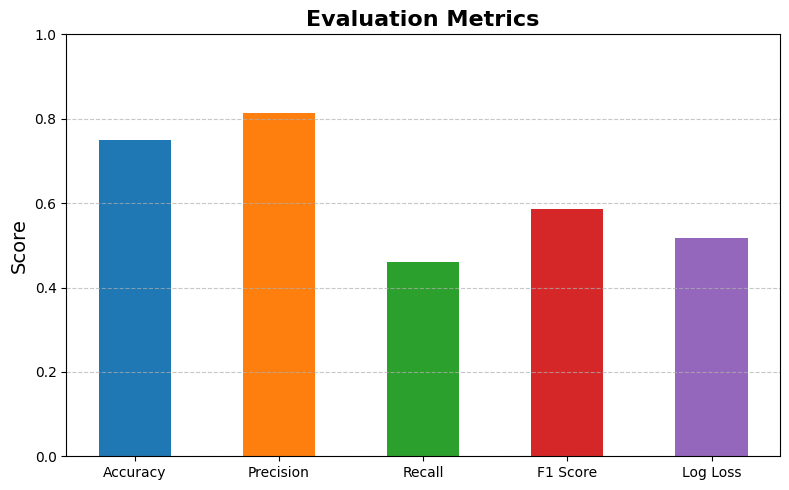

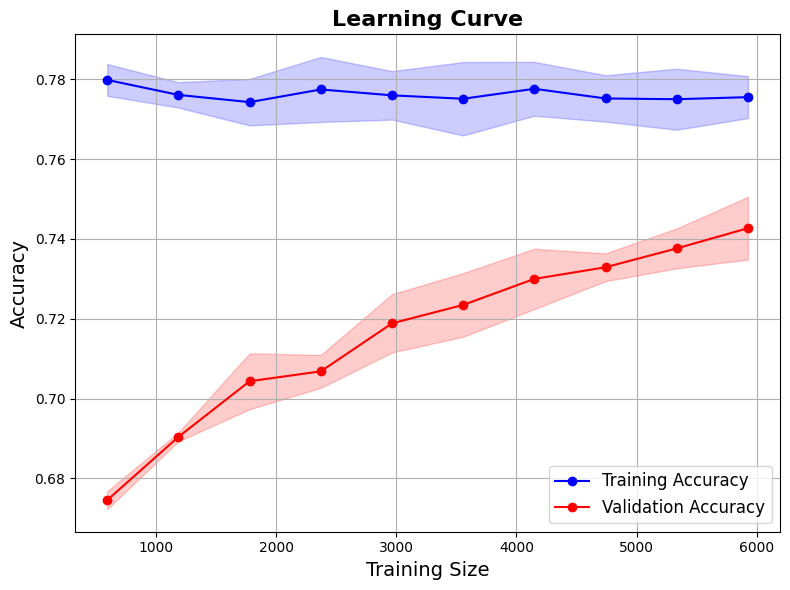

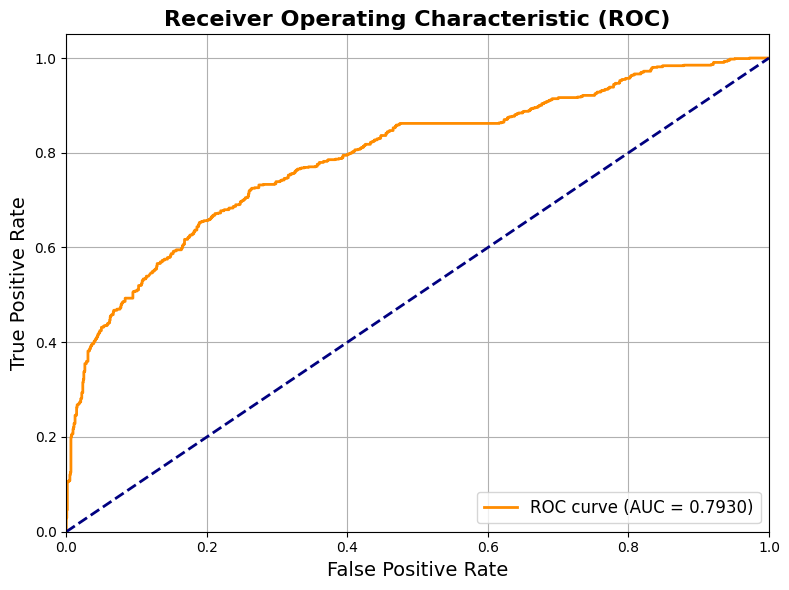

Best model saved to 'best_svm_model.joblib'


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the SVM model
svm = SVC(probability=True, random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'C': [0.1, 1],  # Reduced hyperparameter space
    'kernel': ['rbf'],  # Try just the linear kernel
    'gamma': ['scale'],  # Use just the default gamma
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best SVM Hyperparameters:", best_params)

# Make predictions using the best model
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled) if hasattr(best_model, "predict_proba") else None

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba) if y_val_proba is not None else None

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}" if log_loss_val else "Log Loss: N/A")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))

# Define class labels
class_labels = ['Non-Potable (0)', 'Potable (1)']

# Display the confusion matrix with annotations
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot(cmap="cividis", colorbar=False, ax=ax)

# Add title and labels
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)



plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val if log_loss_val is not None else 0  # Set Log Loss to 0 if None
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba[:, 1])  # For binary classification, use the positive class probabilities
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16, fontweight="bold")
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the best model using joblib
joblib.dump(best_model, 'best_svm_model.joblib')
print("Best model saved to 'best_svm_model.joblib'")
